In [1]:
%load_ext autoreload
%autoreload 2

from ble import get_ble_controller
from base_ble import LOG
from cmd_types import CMD
from funcs import *
from robotClass import *

import time
import numpy as np
import matplotlib.pyplot as plt
import asyncio

LOG.propagate = False

### Lab 9

In [ ]:
# Setup robot
rc = setupRobot()

In [ ]:
rc.pingRobot(clear = True)
rc.updatePID(20, 50, 10, 0, 1, 2, 90)
#rc.move_forward([255, 255], 0, 1)

# Wait one second
await asyncio.sleep(50)

rc.stop()
rc.pingRobot(clear = False)

### Plot Sample Readings

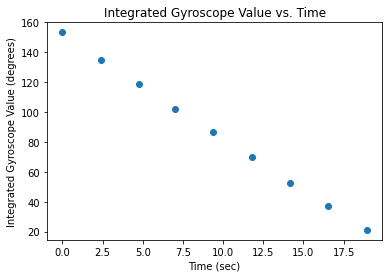

In [10]:
data = [(153.430419921875, 1649832602.174461),
        (134.62078857421875, 1649832604.589386),
        (118.93425750732422, 1649832606.914346),
        (102.1688232421875, 1649832609.2097669),
        (86.39281463623047, 1649832611.518542),
        (69.7164535522461, 1649832613.9947898),
        (52.655242919921875, 1649832616.364266),
        (37.03825759887695, 1649832618.734247),
        (21.154428482055664, 1649832621.119005)]

timeAxis = [ x[1] - data[0][1] for x in data]
gyroAxis = [ x[0] for x in data]

plt.scatter(timeAxis, gyroAxis)
plt.xlabel('Time (sec)')
plt.ylabel('Integrated Gyroscope Value (degrees)')
plt.title('Integrated Gyroscope Value vs. Time')
plt.savefig('gyro_vals.png')

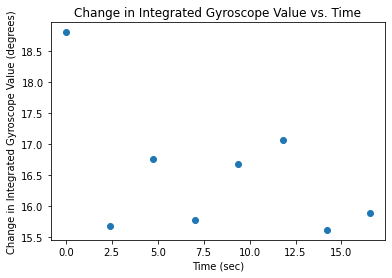

In [11]:
gyroDifs = [ abs(gyroAxis[i + 1] - gyroAxis[i]) for i in range(len(gyroAxis) - 1)]

plt.scatter(timeAxis[:-1], gyroDifs)
plt.xlabel('Time (sec)')
plt.ylabel('Change in Integrated Gyroscope Value (degrees)')
plt.title('Change in Integrated Gyroscope Value vs. Time')
plt.savefig('gyro_val_diffs.png')

In [ ]:
trial = 2

"""
Location

0: (-3,-2)
1: (0,0)
2: (5,3)
3: (5,-3)
4: (0,3)
"""
location = 0

In [ ]:
rc.imu_readings # gyroscope values
storeData(rc.imu_readings, f'data/gyroscopeValues_t{trial}_{location}.txt')

In [ ]:
x = processRunData(f'data/gyroscopeValues_t{trial}_{location}.txt')

In [ ]:
rc.tof_readings # front ToF sensor values
storeData(rc.tof_readings, f'data/TOFValues_t{trial}_{location}.txt')

In [ ]:
y = processRunData(f'data/TOFValues_t{trial}_{location}.txt')

In [ ]:
gyroData = [val[0] % 360 for val in x[:12]]
tofData = y[:12]

In [ ]:
tofData

In [3]:
def polarPlot(gyroData, tofData, title, numValues = 12):
    #x = [ val[0] % 360 for val in gyroData[:numValues] ]
    x = [ val[0] for val in gyroData[:numValues] ]
    y = [ val[0] for val in tofData[:numValues] ]

    fig = plt.figure()
    ax = fig.add_subplot(projection = 'polar')

    ax.scatter(x, y)
    plt.title(title)
    #plt.show()
    plt.savefig(f'PolarPlot_{title}')
    
    return [x, y]

In [4]:
locationMap = {
    0: (-3,-2),
    1: (0,0),
    2: (5,3),
    3: (5,-3),
    4: (0,3)
}

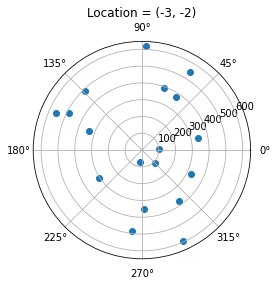

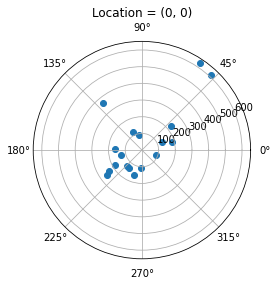

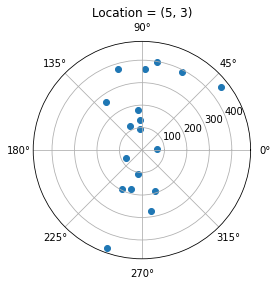

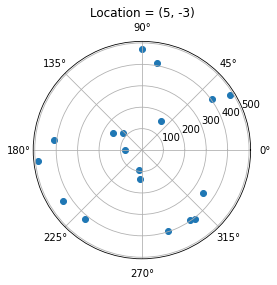

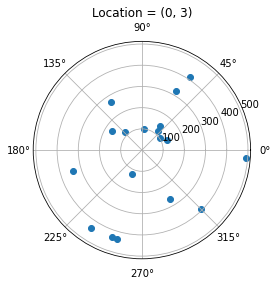

In [5]:
trial = 2
combinedData = []

for location in range(5):
    data1 = processRunData(f'data/gyroscopeValues_t{trial}_{location}.txt')
    data2 = processRunData(f'data/TOFValues_t{trial}_{location}.txt')

    combinedData += [polarPlot(data1, data2, f'Location = {locationMap[location]}', 18)]

In [9]:
posValues = []
tileLength = 300
colors = ['red', 'blue', 'green', 'orange', 'purple']

for i in range(len(combinedData)):
    
    gyro, tof = combinedData[i]
    
    runData = []

    for j in range(len(tof)):
        thetha = gyro[j]
        r = tof[j]
        
        if i == 1:
            runData += [ [ 1 * r * np.cos(np.radians(thetha)) + locationMap[i][0] * 4 * tileLength + 800 - 90 , 3.5 * r * np.sin(np.radians(thetha)) + locationMap[i][0] * 0.25 * tileLength + 0] ]
        else:
            runData += [ [ 4 * r * np.cos(np.radians(thetha)) + locationMap[i][0] * 0.25 * tileLength + 650 - 90 , 3.5 * r * np.sin(np.radians(thetha)) + locationMap[i][0] * 0.25 * tileLength + 0] ]
    
    posValues += [ runData ]

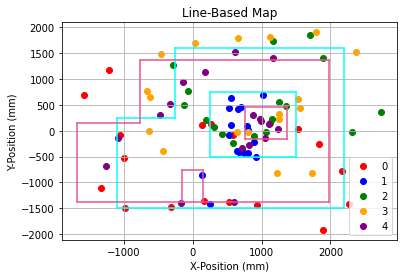

In [34]:
fig, ax = plt.subplots()

for i in range(len(posValues)):
    xVals, yVals = [val[0] for val in posValues[i] ], [ val[1] for val in posValues[i] ]
    ax.scatter(xVals, yVals, c = colors[i], label = i)
                            
ax.legend()
ax.grid(True)

# Boundaries based on datapoints
boundary = [ [(-1100, -1500), (-1100, 250)],
             [(-1100, 250), (-250, 250)],
             [(-250, 250), (-250, 1600)],
             [(-250, 1600), (2200, 1600)],
             [(2200, 1600), (2200, -1500)],
             [(2200, -1500), (-1100, -1500)],
             [(1500, -500), (250, -500)],
             [(250, -500), (250, 750)],
             [(250, 750), (1500, 750)],
             [(1500, 750), (1500, -500)],
           ]

# Boundaries obtained from lab 10 starter code
world = [ [(-1.6764,0.1524), (-1.6764,-1.3716)], [(-1.6764,-1.3716), (1.9812,-1.3716)], 
          [(1.9812,-1.3716), (1.9812,1.3716)], [(1.9812,1.3716), (-0.7620,1.3716)],
          [(-0.7620,1.3716), (-0.7620,0.1524)], [(-0.7620,0.1524), (-1.6764,0.1524)],
          [(0.7620,-0.1524), (1.3716,-0.1524)], [(1.3716,-0.1524), (1.3716,0.4572)],
          [(1.3716,0.4572), (0.7620,0.4572)], [(0.7620,0.4572), (0.7620,-0.1524)],
          [(-0.1524,-1.3716), (-0.1524,-0.7620)], [(-0.1524,-0.7620), (0.1524,-0.7620)],
          [(0.1524,-0.7620), (0.1524,-1.3716)] ]

for point in boundary:
    ax.plot([ point[0][0], point[1][0] ], [ point[0][1], point[1][1] ], color = 'cyan')

for point in world:
    ax.plot([ 1000 * point[0][0], 1000 * point[1][0] ], [ 1000 * point[0][1], 1000 * point[1][1]], color = '#e85395' )

plt.title('Line-Based Map')
plt.xlabel('X-Position (mm)')
plt.ylabel('Y-Position (mm)')
#plt.show()
plt.savefig('lineBasedMap.png')